# Logistic Regression based Modelling
### we will model CP1, CP2, CP3 | CP-> Classification problem
### for each of the classification problem, we will use the curated data sets including both upsampling and down-sampling.
### in total, we will produce 5 modelling simulations - 2xCP1, 1XCP2, 3XCP3
### CP2 does not require data balancing hence no need for down/up sampling

In [69]:
#import relevant libraries for random forest

import os

import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler  

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import matplotlib.pyplot as plt
#import scikitplot as skplt


## Classification Problem 1 Modelling

In [71]:
# locate & load datasets

fpath       = os.path.join(os.getcwd(), "cp1")

#Test data - find current working directory, build the full pathname of the file, and load the data
fpath_test = os.path.join(fpath, "cp1_test.csv")
data_cp1_test=pd.read_csv(fpath_test)

y1_test = data_cp1_test.readmitted

print(y1_test.unique())
X1_test = data_cp1_test.drop(columns=["readmitted"])


#Train data - find current working directory, build the full pathname of the file, and load the data

fpath_train_ds = os.path.join(fpath, "cp1_train_downsampled.csv")

fpath_train_us = os.path.join(fpath, "cp1_train_upsampled.csv")

print("file paths: ", fpath_train_ds, fpath_train_us)


data_cp1_train_ds = pd.read_csv(fpath_train_ds)
data_cp1_train_us = pd.read_csv(fpath_train_us)

[0 2 1]
file paths:  C:\Users\ajayv\iCloudDrive\Documents\work\OneDrive - Nokia\01-knowledge\01-NUS-MTechISS\02-2019sem2\CA1\diabetesclassifier\dataset_diabetes\cp1\cp1_train_downsampled.csv C:\Users\ajayv\iCloudDrive\Documents\work\OneDrive - Nokia\01-knowledge\01-NUS-MTechISS\02-2019sem2\CA1\diabetesclassifier\dataset_diabetes\cp1\cp1_train_upsampled.csv


## Classification problem 1: Down sampling 

In [39]:
#seperate features and predicted variables

y1_train_ds = data_cp1_train_ds.readmitted

X1_train_ds = data_cp1_train_ds.drop(columns=["readmitted"])

In [40]:
# check for index columns from past
# X_train_ds.reset_index(drop=True)

In [41]:
# Transform variables. apply LogReg

scaler = StandardScaler()  #this is z-score based normalization
scaler.fit(X1_train_ds)


X1_train_ds = scaler.transform(X1_train_ds)  

X1_test_ds = scaler.transform(X1_test)

logreg = LogisticRegression(C=0.01).fit(X1_train_ds, y1_train_ds)
print("Training set score: {:.3f}".format(logreg.score(X1_train_ds, y1_train_ds)))
print("Test set score: {:.3f}".format(logreg.score(X1_test_ds, y1_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set score: 0.442
Test set score: 0.482


In [47]:
# print(logreg.intercept_.T)

# print(logreg.coef_.T)

y1_pred_ds = logreg.predict(X1_test_ds)
print(confusion_matrix(y1_test, y1_pred_ds))  
print(classification_report(y1_test, y1_pred_ds)) 

[[8705 2299 2321]
 [3775 2225 2788]
 [1068  597 1095]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.65     13325
           1       0.43      0.25      0.32      8788
           2       0.18      0.40      0.24      2760

    accuracy                           0.48     24873
   macro avg       0.42      0.43      0.40     24873
weighted avg       0.52      0.48      0.49     24873



## Classification problem 1: Up Sampling

In [43]:
#seperate features and predicted variables

y1_train_us = data_cp1_train_us.readmitted

X1_train_us = data_cp1_train_us.drop(columns=["readmitted"])

In [44]:
# Transform variables. apply LogReg

scaler = StandardScaler()  #this is z-score based normalization
scaler.fit(X1_train_us)


X1_train_us = scaler.transform(X1_train_us)  

X1_test_us = scaler.transform(X1_test)

logreg = LogisticRegression(C=0.01).fit(X1_train_us, y1_train_us)
print("Training set score: {:.3f}".format(logreg.score(X1_train_us, y1_train_us)))
print("Test set score: {:.3f}".format(logreg.score(X1_test_us, y1_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set score: 0.438
Test set score: 0.483


In [46]:
# print(logreg.intercept_.T)

# print(logreg.coef_.T)

y1_pred_us = logreg.predict(X1_test_us)
print(confusion_matrix(y1_test, y1_pred_us))  
print(classification_report(y1_test, y1_pred_us)) 

[[8695 2293 2337]
 [3772 2221 2795]
 [1066  592 1102]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.65     13325
           1       0.43      0.25      0.32      8788
           2       0.18      0.40      0.25      2760

    accuracy                           0.48     24873
   macro avg       0.42      0.43      0.40     24873
weighted avg       0.52      0.48      0.49     24873



# Classification Problem 2 Modelling

In [49]:
# locate and load datasets

fpath       = os.path.join(os.getcwd(), "cp2")

#Test data - find current working directory and build the full pathname of the file
fpath_test = os.path.join(fpath, "cp2_test.csv")
data_cp2_test=pd.read_csv(fpath_test)


y2_test = data_cp2_test.readmit_noreadmit
X2_test = data_cp2_test.drop(columns=["readmit_noreadmit"])


#Train data - find current working directory and build the full pathname of the file

fpath_train = os.path.join(fpath, "cp2_train.csv")
print("file paths: ", fpath_train)

data_cp2_train = pd.read_csv(fpath_train)

file paths:  C:\Users\ajayv\iCloudDrive\Documents\work\OneDrive - Nokia\01-knowledge\01-NUS-MTechISS\02-2019sem2\CA1\diabetesclassifier\dataset_diabetes\cp2\cp2_train.csv


In [50]:
y2_test.unique()

array([0, 1], dtype=int64)

In [51]:
#seperate features and predicted variables

y2_train = data_cp2_train.readmit_noreadmit

X2_train = data_cp2_train.drop(columns=["readmit_noreadmit"])

In [52]:
# Transform variables. apply LogReg

scaler = StandardScaler()  #this is z-score based normalization
scaler.fit(X2_train)


X2_train = scaler.transform(X2_train)  

X2_test = scaler.transform(X2_test)

logreg = LogisticRegression(C=0.01).fit(X2_train, y2_train)
print("Training set score: {:.3f}".format(logreg.score(X2_train, y2_train)))
print("Test set score: {:.3f}".format(logreg.score(X2_test, y2_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.617
Test set score: 0.622


In [53]:
# print(logreg.intercept_.T)

# print(logreg.coef_.T)

y2_pred = logreg.predict(X2_test)
print(confusion_matrix(y2_test, y2_pred))  
print(classification_report(y2_test, y2_pred)) 

[[10536  2789]
 [ 6609  4939]]
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     13325
           1       0.64      0.43      0.51     11548

    accuracy                           0.62     24873
   macro avg       0.63      0.61      0.60     24873
weighted avg       0.63      0.62      0.61     24873



# Classification Problem 3 Modelling

In [54]:
# locate & load datasets

fpath       = os.path.join(os.getcwd(), "cp3")

#Test data - find current working directory, build the full pathname of the file, and load the data
fpath_test = os.path.join(fpath, "cp3_test.csv")
data_cp3_test=pd.read_csv(fpath_test)

data_cp3_test.readmit_in_30_days

y3_test = data_cp3_test.readmit_in_30_days
X3_test = data_cp3_test.drop(columns=["readmit_in_30_days"])


#Train data - find current working directory, build the full pathname of the file, and load the data

fpath_train_ds = os.path.join(fpath, "cp3_train_downsampled.csv")

fpath_train_us = os.path.join(fpath, "cp3_train_upsampled.csv")

print("file paths: ", fpath_train_ds, fpath_train_us)


data_cp3_train_ds = pd.read_csv(fpath_train_ds)
data_cp3_train_us = pd.read_csv(fpath_train_us)

file paths:  C:\Users\ajayv\iCloudDrive\Documents\work\OneDrive - Nokia\01-knowledge\01-NUS-MTechISS\02-2019sem2\CA1\diabetesclassifier\dataset_diabetes\cp3\cp3_train_downsampled.csv C:\Users\ajayv\iCloudDrive\Documents\work\OneDrive - Nokia\01-knowledge\01-NUS-MTechISS\02-2019sem2\CA1\diabetesclassifier\dataset_diabetes\cp3\cp3_train_upsampled.csv


## Classification Problem 3: Down Sampling

In [55]:
#seperate features and predicted variables

y3_train_ds = data_cp3_train_ds.readmit_in_30_days

X3_train_ds = data_cp3_train_ds.drop(columns=["readmit_in_30_days"])

In [56]:
# Transform variables. apply LogReg

scaler = StandardScaler()  #this is z-score based normalization
scaler.fit(X3_train_ds)


X3_train_ds = scaler.transform(X3_train_ds)  

X3_test_ds = scaler.transform(X3_test)

logreg = LogisticRegression(C=0.01).fit(X3_train_ds, y3_train_ds)
print("Training set score: {:.3f}".format(logreg.score(X3_train_ds, y3_train_ds)))
print("Test set score: {:.3f}".format(logreg.score(X3_test_ds, y3_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.600
Test set score: 0.656


In [57]:
# print(logreg.intercept_.T)

# print(logreg.coef_.T)

y3_pred_ds = logreg.predict(X3_test_ds)
print(confusion_matrix(y3_test, y3_pred_ds))  
print(classification_report(y3_test, y3_pred_ds)) 

[[5978 2876]
 [ 548  548]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      8854
           1       0.16      0.50      0.24      1096

    accuracy                           0.66      9950
   macro avg       0.54      0.59      0.51      9950
weighted avg       0.83      0.66      0.72      9950



## Classification Problem 3: Up Sampling

In [59]:
#seperate features and predicted variables

y3_train_us = data_cp3_train_us.readmit_in_30_days

X3_train_us = data_cp3_train_us.drop(columns=["readmit_in_30_days"])


In [60]:
# Transform variables. apply LogReg

scaler = StandardScaler()  #this is z-score based normalization
scaler.fit(X3_train_us)


X3_train_us = scaler.transform(X3_train_us)  

X3_test_us = scaler.transform(X3_test)

logreg = LogisticRegression(C=0.01).fit(X3_train_us, y3_train_us)
print("Training set score: {:.3f}".format(logreg.score(X3_train_us, y3_train_us)))
print("Test set score: {:.3f}".format(logreg.score(X3_test_us, y3_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.681
Test set score: 0.864


In [61]:
# print(logreg.intercept_.T)

# print(logreg.coef_.T)

y3_pred_us = logreg.predict(X3_test_us)
print(confusion_matrix(y3_test, y3_pred_us))  
print(classification_report(y3_test, y3_pred_us)) 

[[8459  395]
 [ 960  136]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      8854
           1       0.26      0.12      0.17      1096

    accuracy                           0.86      9950
   macro avg       0.58      0.54      0.55      9950
weighted avg       0.83      0.86      0.84      9950



### ROC - CP3/Upsampling

Accuracy= 0.8638190954773869


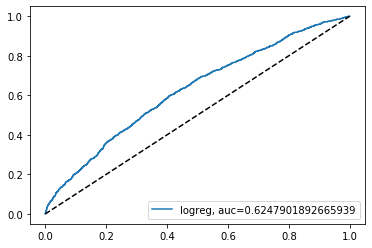

In [63]:
from sklearn import metrics


print("Accuracy=", metrics.accuracy_score(y3_test, y3_pred_us))
 
y3_pred_proba = logreg.predict_proba(X3_test_us)[::,1]
fpr, tpr, _ = metrics.roc_curve(y3_test,  y3_pred_proba)
auc = metrics.roc_auc_score(y3_test, y3_pred_proba)

plt.plot(fpr,tpr,label="logreg, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

## Gain and lift curve - CP3 upsampling

In [64]:

#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y3_pred_probas = logreg.predict_proba(X3_test_us)

ModuleNotFoundError: No module named 'scikitplot'

In [65]:
skplt.metrics.plot_cumulative_gain(y3_test, y3_pred_probas)
plt.show()

NameError: name 'skplt' is not defined

In [66]:
skplt.metrics.plot_lift_curve(y3_test, y3_pred_probas)
plt.show()

NameError: name 'skplt' is not defined